# Pair Trading - Cointegration Method


## What is Pair Trading?

*Pair trading* is a statistical arbitrage strategy which involves betting on the spread between two securities and hence on their mispricing. 

As defined by Ehrman (2006),  statistical arbitrage means opening offsetting positions in securities which have been historically or statistically related, but whose price relationship is temporally deviating. Over time, the difference in prices fluctuates around an average, moving back and forth from a mathematically determined equilibrium point (usually the mean).

Statistical arbitrage relies wholly on the convergence of the securities toward their average prices, and hence on their long-run relationship. This means that the essential and first step for a profitable pair trading strategy is selecting assets which move together in the long-run. This is done by applying a selection criteria on the choosen universe of securities and over a so-called "formation" period. For our Machine Learning experts, it can be basically thought as a "train" sample. The second step of Pair Trading, as the name suggest, is the actual trading, which is performed on the trading period that follows the selection period.

Going back to the second one, there are several methods in the literature and in the industry which aim at selecting the right pair of securities. For the sake of briefity, we will limit ourselves to the **Cointegration Method** developed by Vidyamurthy (2004), which has gained wide consensus and importance in literature due to its logic and (at least theoretical) profitability.
But before delving into the deepness of Pair Trading, we first have to understand what cointegration is. 


## Cointegration 

Cointegration refers to the property of two or more time series to  "move" together in the long run around an equilibrium point (a common trend) for a considered time period. Hence, cointegration can be considered as a long-run correlation among two or several assets. More technically, a if there exsists a linear combination of the time series that is stationary, then they are cointegrated.

The singular time-series must be non-stationary (generalizing of order I(1)) in order to show cointegration. Stationarity is the property that a time series may have of keeping its mean, variance and covariance constant over time.  I(1) basically means that their non-stationarity can be "cured" by taking first-difference of the series. 

Some examples of cointegrated time series is equity prices and dividends, and also prices of related securities (it happens a lot in cryptos). 

Cointegration is so important in the financial world that the guys who developed a proper test for it, namely Clive Granger and Robert Engle, won a Nobel Prize for that in 2003.

The 2 steps Engle-Granger procedure aims at tasting pairs of time series $(n = 2)$. It uses the **Agumented Dickey Fueller (DF) Test**  for Unit Root , having the Null Hypotehsis of no stationarity , to make sure that all the Time Series are $I(1)$ . This is done by performing a cointegrating regression using OLS, regressing one time series on the other. 


  $$ y = \alpha + \beta x + u $$

  where y and x are two different time series. 

Then it tests whether the residuals $\hat{u}$ have a unit root with the ADF Test. If they have it, then the time series is not stationary and not cointegrated. If the test is passed and the linear combination of time series is $I(0)$.







## Test a potential cointegrated pair

Consider the daily prices of Hong Kong Exchanges and Clearing Limited (HKG: 0388) and China Overseas Land and Investment Limited (HKG: 0688) between 2000-2004. You can download the corresponding data from Yahoo Finance.

First of all, let’s prepare our data for future manipulations. 

In [ ]:

import pandas as pd
import pandas_datareader as pdr
import numpy as np


hkex = pdr.DataReader("0388.HK", "yahoo", start = "2000", end = "2005")
china = pdr.DataReader("0688.HK", "yahoo", start = "2000", end = "2005")


In [ ]:
hk_mod = hkex[["Adj Close"]].copy()
ch_mod = china[["Adj Close"]].copy()

# Merge data
df = pd.merge(hk_mod, ch_mod, how = "inner", left_index=True, right_index=True)
df.rename(columns = {'Adj Close_x':'Adj Close_hkex', 'Adj Close_y':'Adj Close_china'}, inplace = True)

# Divide into training and testing sets
train = df.loc["2000":"2003"]
test  = df.loc["2004"]

In [ ]:
# Detect missing values
hkex.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
china.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
# Check Max and Min (No price outliers detected)
hkex.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1179.000000,1179.000000,1179.000000,1179.000000,1.179000e+03,1179.000000
mean,14.094699,13.743299,13.923282,13.927735,6.612951e+06,7.339199
std,3.363849,3.320341,3.349108,3.341706,1.015735e+07,2.106648
min,7.950000,7.000000,7.200000,7.900000,0.000000e+00,3.913964
25%,11.175000,10.875000,11.000000,11.000000,2.720700e+06,5.519477
50%,14.050000,13.750000,13.900000,13.900000,4.535000e+06,6.910254
75%,16.799999,16.400000,16.600000,16.600000,7.151000e+06,8.971625
max,21.900000,21.000000,21.600000,21.900000,1.612305e+08,12.629326


In [ ]:
china.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03,1227.000000
mean,1.064672,1.020986,1.044273,1.044753,1.938796e+07,0.616238
std,0.334073,0.318967,0.327033,0.325420,3.742553e+07,0.210631
min,0.588458,0.559517,0.578811,0.578811,0.000000e+00,0.331282
25%,0.800688,0.762101,0.781395,0.781395,5.604936e+06,0.453572
50%,0.945391,0.916451,0.926098,0.926098,1.108133e+07,0.532947
75%,1.263737,1.215503,1.244444,1.239621,2.200012e+07,0.726820
max,2.049956,1.890783,1.929370,1.929370,1.031178e+09,1.172291


We can see that there are no missing values detected and no outliers.

## Check that these two time series are I(1) and show that they are cointegrated by relying on a appropriate statistical test.

Engle-Granger cointegration test consists of testing whether two paired assets prices linear regression residuals or spread are stationary after:


1.   Testing that individual assets prices time series are not stationary 
2.   Individual asset prices become staitionary after taking their "First Difference", which is the meaning of being integrated of order I(1).

This testing can be done by the mentioned Augmented Dickey-Fuller Test (for 2 securities) or by the Johansen cointegration test (2 or more assets).

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(train['Adj Close_hkex'])

(-1.3281156529875864,
 0.6162132438881444,
 1,
 861,
 {'1%': -3.4379677736185514,
  '10%': -2.568560548763626,
  '5%': -2.8649026847264074},
 -771.4165290234102)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(train['Adj Close_china'])

(-1.7226689279361593,
 0.4194722301909397,
 1,
 861,
 {'1%': -3.4379677736185514,
  '10%': -2.568560548763626,
  '5%': -2.8649026847264074},
 -4533.433147844218)

Stocks are not stationary. A large p-value (> 0.01) indicates really scarce evidence against the Null Hypothesis of Non-stationarity. Hence, we fail to reject the null hypothesis. For HKEX and CHINA stocks to be I(1), we need to show that the first differences of the individual time series of prices are stationary.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train['hkex_dif'] = train['Adj Close_hkex'].diff()
train['china_dif'] = train['Adj Close_china'].diff()

In [ ]:
# Augemented Dickey-Fuller test for the first difference HKEX
adfuller(train['hkex_dif'].iloc[1::])

(-29.062210010275432,
 0.0,
 0,
 861,
 {'1%': -3.4379677736185514,
  '10%': -2.568560548763626,
  '5%': -2.8649026847264074},
 -773.7341348766445)

In [ ]:
# Augemented Dickey-Fuller test for the first difference CHINA
adfuller(train['china_dif'].iloc[1::])

(-27.046156336635363,
 0.0,
 0,
 861,
 {'1%': -3.4379677736185514,
  '10%': -2.568560548763626,
  '5%': -2.8649026847264074},
 -4527.591421187008)

Due to a small p-value (< 0.01) we can reject the Null hypothesis of non-stationarity. Thus, HKEX and CHINA prices are I(1). To show that HKEX and CHINA prices are cointegrated, we need to show that the residuals coming from regressing HKEX on CHINA are I(0), meaning they are stationary.

In [ ]:
import statsmodels.api as sm
from sklearn import linear_model

# ols - ordinary least squares regression
# model = sm.OLS(y, X) y - dependent variable

X = train['Adj Close_hkex'].values.reshape(-1, 1)
y = train['Adj Close_china'].values.reshape(-1, 1)


In [ ]:
#china~hkix (without an intercept)
model11 = sm.OLS(y, X).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.531e+04
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                        0.00
Time:                        00:57:04   Log-Likelihood:                          779.30
No. Observations:                 863   AIC:                                     -1557.
Df Residuals:                     862   BIC:                                     -1552.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0802      0.001    159.094      0.000       0.079       0.081
==============================================================================
Omnibus:                       55.148   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.528
Skew:                           0.556   Prob(JB):                     1.78e-16
Kurtosis:                       3.884   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model11.params[0]

0.08021531678910229

In [ ]:
adfuller(model11.resid)

(-2.74464352417064,
 0.06662642045497073,
 0,
 862,
 {'1%': -3.4379589097679975,
  '10%': -2.568558467170181,
  '5%': -2.86489877693665},
 -4430.144654544998)

In [ ]:
#hkex~china (without an intercept)
model22 = sm.OLS(X, y).fit()
model22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.531e+04
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                        0.00
Time:                        00:57:04   Log-Likelihood:                         -1383.6
No. Observations:                 863   AIC:                                      2769.
Df Residuals:                     862   BIC:                                      2774.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.0559      0.076    159.094      0.000      11.907      12.205
==============================================================================
Omnibus:                       46.406   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.434
Skew:                          -0.499   Prob(JB):                     1.24e-13
Kurtosis:                       3.810   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
adfuller(model22.resid)

(-2.373977709071433,
 0.14921609254741114,
 2,
 860,
 {'1%': -3.4379766581448803,
  '10%': -2.5685626352082207,
  '5%': -2.8649066016199836},
 -224.93260576940588)

The critical values for α=10%,5% and 1% change in this context to −2.56, −2.86 and −3.43 respectively. That’s why we can reject null hypothesis of non-stationarity only on 10% level for the first model (model11 china~hkex). Our data is cointegrated and you can see that from the graph below.

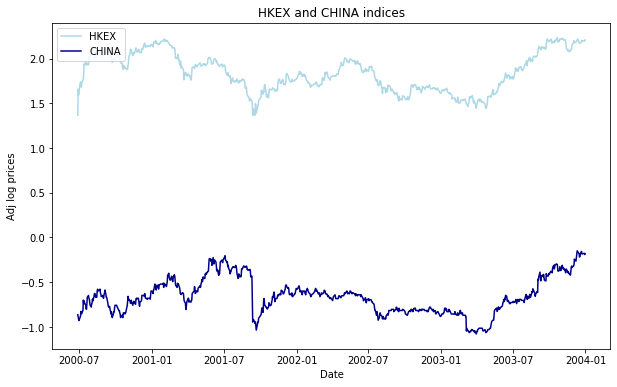

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("HKEX and CHINA indices")
plt.plot(np.log(train['Adj Close_hkex']), color="lightblue", label="HKEX")
plt.plot(np.log(train['Adj Close_china']), color="darkblue",  label="CHINA")
plt.xlabel("Date")
plt.ylabel("Adj log prices")
plt.legend(loc="upper left")
plt.show()

## Estimate their cointegrated relation and construct explicitly an investment strategy

### Apple and GM Spread Calculation

Our model of cointegration should look like the following equation:
$$
Y=\beta X + ε
$$

But we have an intercept that we need to set to zero so as to see a direct relation of one stock on another. In
addition, we use a train data to construct the spread:
$$
S = Y - \beta X
$$

In [ ]:
# Take alpha coefficient from the first model
model11.params[0]

0.08021531678910229

In [ ]:
train["spread1"] = train['Adj Close_china']-0.0802*train['Adj Close_hkex']

So we have the model, where cointegrated coefficient $\beta= 0.802$ and the spread looks like this: $S=CHINA-0.0802\ HKEX$
  
Now we calculate the mean of the spread:

In [ ]:
import statistics
x1 = statistics.mean(train["spread1"])
y1 = np.repeat(x1,863)

train["spread1_m"] = y1

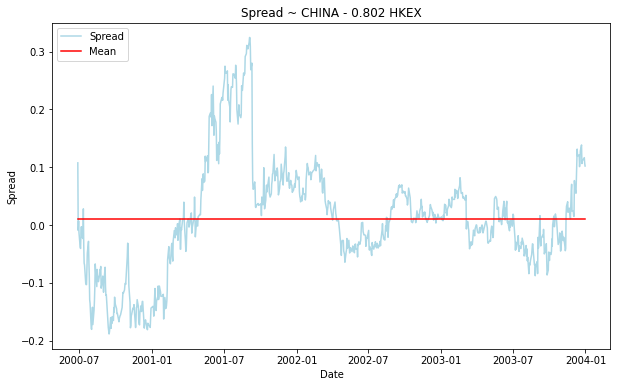

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Spread ~ CHINA - 0.802 HKEX")
plt.plot(train["spread1"], color="lightblue", label="Spread")
plt.plot(train["spread1_m"], color="red",  label="Mean")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend(loc="upper left")
plt.show()


As we see, the spread is centered around zero. Some resources recommend to use this spread to perform the stationary test. Nevertheless, the stationarity test is based on a linear combination and computing  the residuals and testing them gives equal results. Here we additionally prove
that our spread is stationary:

In [ ]:
adfuller(train["spread1"])

(-2.744589877163885,
 0.06663495715354179,
 0,
 862,
 {'1%': -3.4379589097679975,
  '10%': -2.568558467170181,
  '5%': -2.86489877693665},
 -4430.243153431483)

ADF test rejects the null hypothesis of non-stationarity on 10% level.



### HKEX and CHINA Rolling Spread Z-Score

So now we are coming back to testing data and using the coefficient that we derived before, namely $\beta= 0.0802$.

We compute the spread on the Test dataset:

In [ ]:
test["spread"] = test['Adj Close_china']-0.0802*test['Adj Close_hkex']

Computing the z-score:
$$
z = \dfrac{s_t-μ(s)_{t,m}}{σ(s)_{t,m}}
$$

It can be easily seen that the z-score is the normalized spread of asset prices . The Z-score is used to generate corresponding trading signals. We use a rolling z-score in order to avoid look ahead bias *.

*(Look ahead bias - is a situation when we use some information in the calculations which was not available a that moment. This leads to economists and analysts putting too much confidence in their models and the ability
of the model to predict and mitigate future events).


In [ ]:
col_mean = test["spread"].rolling(window=21).mean() # there are 21 trading days in one month
col_std = test["spread"].rolling(window=21).std()
col_spr = test["spread"]

In [ ]:
test["ZSCORE"] = (col_spr - col_mean)/col_std

Now we draw the lines with -1.5, -0.5, 0.5, 1.5 (as standard deviations) in order to create our trading strategy:

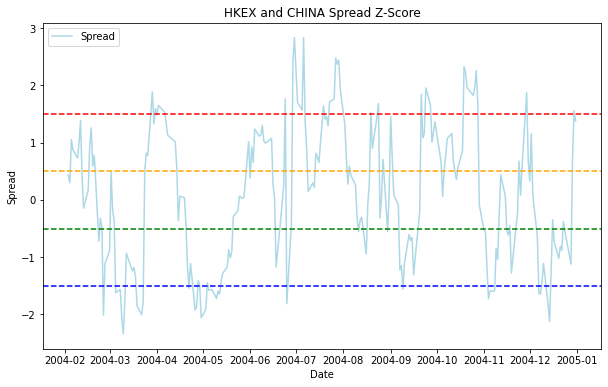

In [ ]:
plt.figure(figsize=(10,6))
plt.title("HKEX and CHINA Spread Z-Score")
plt.plot(test["ZSCORE"], color="lightblue", label="Spread")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend(loc="upper left")
plt.axhline(-1.5, color='blue', linestyle='dashed') # horizontal
plt.axhline(-0.5, color='green', linestyle='dashed') # horizontal
plt.axhline(0.5, color='orange', linestyle='dashed') # horizontal
plt.axhline(1.5, color='red', linestyle='dashed') # horizontal
plt.show()

### Trading Strategy Signals

Trading Signals are based on a "filter" strategy, meaning they are triggered when the Z-Score crosses a certain threshold. Each crossing
corresponds to trading positions that we need to acquire.

Long position: buy Spread (buy CHINA sell HKEX)
- Start long when $z>-1.5$ goes  to $z<-1.5$
- End long when $z<-0.5$ goes to $z>-0.5$

Short position: sell Spread (sell CHINA buy HKEX)
- Start short when $z<1.5$ goes  to $z>1.5$
- End short when $z>0.5$ goes to $z<0.5$

In [ ]:
signals = test.copy()

# As an example for the first line:
# "If our z-score at t-2 was greater than -1.5 and z-score t-1 was smaller than -1.5 we enter Long"

signals.loc[(signals["ZSCORE"].shift(2) > -1.5) & (signals["ZSCORE"].shift(1) < -1.5), 'signals?'] = -2  #now signal -2 means to enter Long
signals.loc[(signals["ZSCORE"].shift(2) < -0.5) & (signals["ZSCORE"].shift(1) > -0.5), 'signals?'] = -1  #now signal -1 means to exit Long
signals.loc[(signals["ZSCORE"].shift(2) < 1.5) & (signals["ZSCORE"].shift(1) > 1.5), 'signals?'] = 2 #now signal 2 means to enter Short
signals.loc[(signals["ZSCORE"].shift(2) > 0.5) & (signals["ZSCORE"].shift(1) < 0.5), 'signals?'] = 1  #now signal 1 means to exit Short


signals.loc[signals['signals?'].isnull(), 'signals?'] = 0 #substitute NaN with zero

Here is the visualization of our strategy (Apple and GM stocks example):
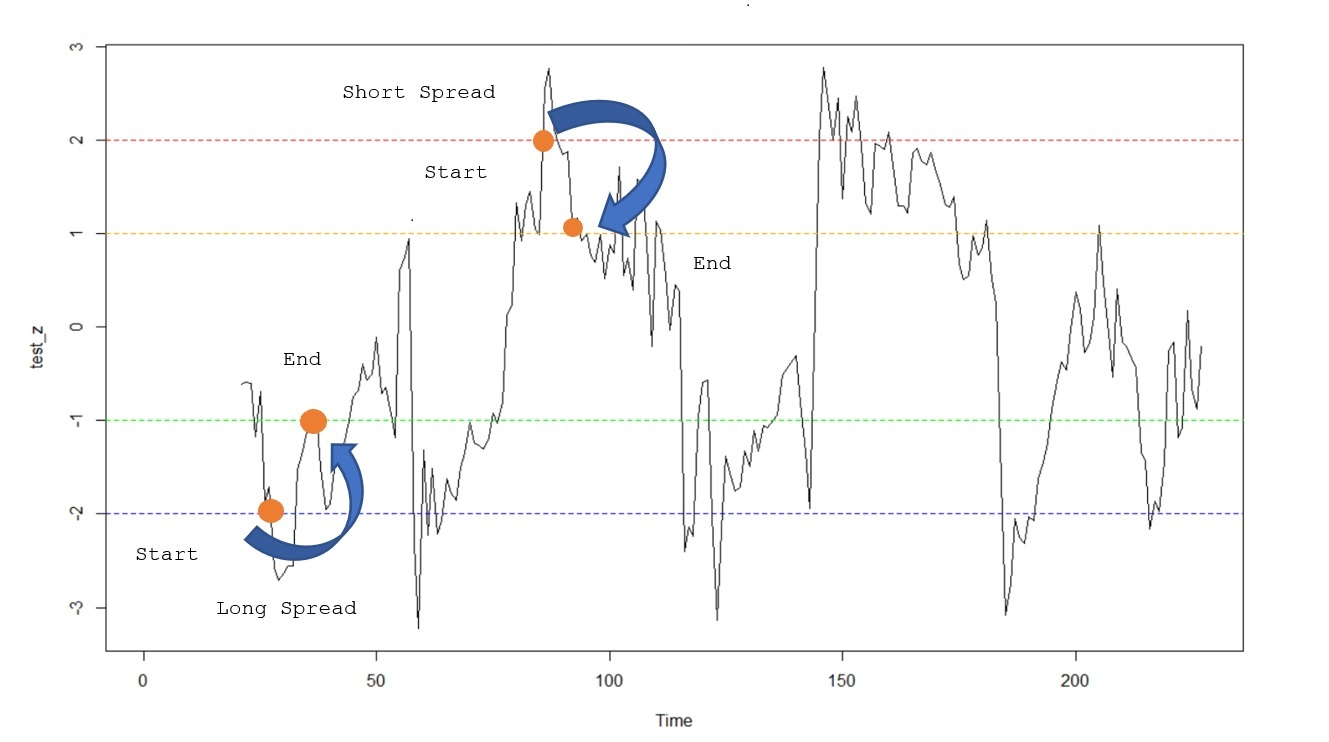

### Trading Strategy Positions

Now depending on signals we need to assign trading positions (1 for Long, -1 for Short, 0 for stay):

In [ ]:
signals.loc[signals['signals?']==-2, 'positions?'] = 1
signals.loc[signals['signals?']==-1, 'positions?'] = 0
signals.loc[signals['signals?']==2, 'positions?'] = -1
signals.loc[signals['signals?']==1, 'positions?'] = 0

signals['positions?'].iloc[0] = 0
signals['positions?'].fillna(method='ffill', inplace=True)

Here is the visualization of our strategy (Apple and GM stocks example):
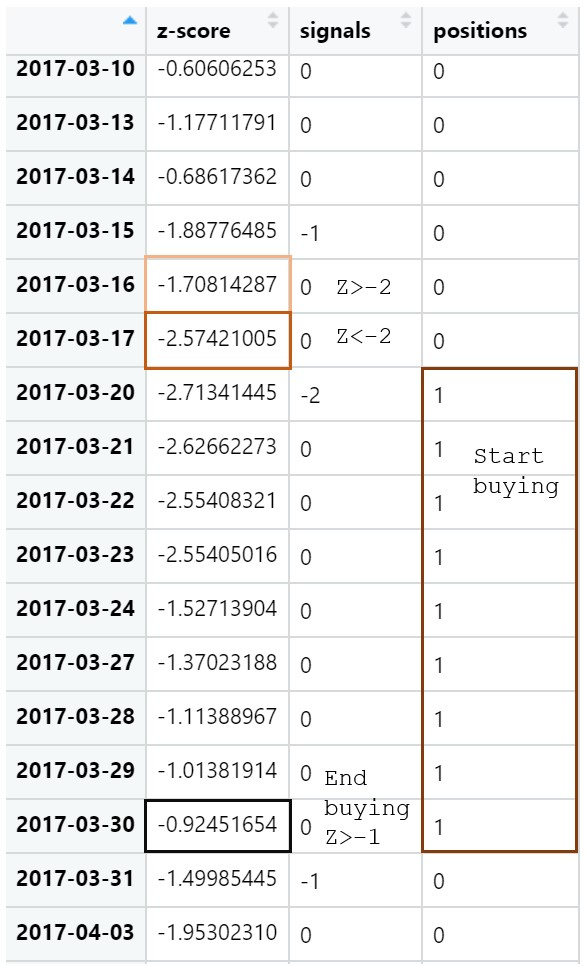


We go long when the z-score is increasing, and we go short when z-score is decreasing:

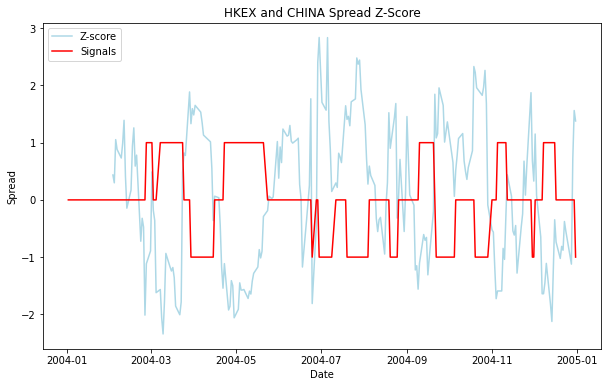

In [ ]:
plt.figure(figsize=(10,6))
plt.title("HKEX and CHINA Spread Z-Score")
plt.plot(test["ZSCORE"], color="lightblue", label="Z-score")
plt.plot(signals["positions?"], color="red", label="Signals")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend(loc="upper left")
plt.show()

## Illustrate the benefit of this investment strategy compared to the one where you equally invest into both assets

### Pairs Strategies Performance Comparison

In order to make a comparison we need to calculate returns in test data:

In [ ]:
signals["Daily Return HKEX"] = test["Adj Close_hkex"] / test["Adj Close_hkex"].shift(1) - 1
signals["Daily Return CHINA"] = test["Adj Close_china"] / test["Adj Close_china"].shift(1) - 1

signals["R+1 HKEX"] = signals["Daily Return HKEX"]+1
signals["Cumprod HKEX"] = signals["R+1 HKEX"].cumprod()

signals["R+1 CHINA"] = signals["Daily Return CHINA"]+1
signals["Cumprod CHINA"] = signals["R+1 CHINA"].cumprod()

We compute the returns of our pair trading strategy:

Sharpe ratio is =  0.8331977123105214 for the Spread
Sharpe ratio is =  1.1546796164703121 for HKEX
Sharpe ratio is =  0.8740483686125643 for CHINA
Annualized Volatility is =  0.4789520883147567 for the Spread
Annualized Volatility is =  0.30471211630104805 for HKEX
Annualized Volatility is =  0.48885137044431226 for CHINA


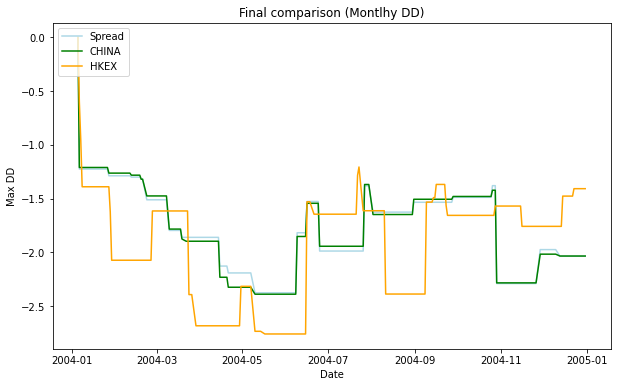

In [ ]:
signals['spread returns'] = signals["Daily Return CHINA"]-0.0802*signals['Daily Return HKEX']
signals["trading"] = signals["positions?"]*signals['spread returns']


signals["R+1 spread"] = signals["trading"]+1
signals["Cumprod spread"] = signals["R+1 spread"].cumprod()

#for the spread
SR_Ann_Spread = (signals['spread returns'].mean() / signals['spread returns'].std()) * (252**0.5)
Ann_sd_Spread =  signals['spread returns'].std() *(252**0.5)
signals["Max_DD_Spread"] = (signals['spread returns']/ signals['spread returns'].rolling(21, min_periods=1).max() - 1.0).rolling(21, min_periods=1).min()
#signals["Max_DD_Spread"] = signals['spread returns']/ signals['spread returns'].rolling(252, min_periods=1).max() - 1.0

#for HKEX
SR_Ann_HKEX = (signals["Daily Return HKEX"].mean() /signals["Daily Return HKEX"].std()) * (252**0.5)
Ann_sd_HKEX = signals["Daily Return HKEX"].std() * (252**0.5)
signals["Max_DD_HKEX"]  = (signals["Daily Return HKEX"]/ signals["Daily Return HKEX"].rolling(21, min_periods=1).max() - 1.0).rolling(21, min_periods=1).min()
#signals["Max_DD_HKEX"]  = signals["Daily Return HKEX"]/ signals["Daily Return HKEX"].rolling(252, min_periods=1).max() - 1.0

#for CHINA
SR_Ann_CHINA = (signals["Daily Return CHINA"].mean() /signals["Daily Return CHINA"].std()) * (252**0.5)
Ann_sd_CHINA = signals["Daily Return CHINA"].std() * (252**0.5)
signals["Max_DD_CHINA"] = (signals["Daily Return CHINA"]/ signals["Daily Return CHINA"].rolling(21, min_periods=1).max() - 1.0).rolling(21, min_periods=1).min()
#signals["Max_DD_CHINA"] = signals["Daily Return CHINA"]/ signals["Daily Return CHINA"].rolling(252, min_periods=1).max() - 1.0

print( "Sharpe ratio is = " , SR_Ann_Spread,"for the Spread")
print( "Sharpe ratio is = " , SR_Ann_HKEX  ,"for HKEX")
print( "Sharpe ratio is = " , SR_Ann_CHINA ,"for CHINA")

print( "Annualized Volatility is = ", Ann_sd_Spread, "for the Spread" )
print( "Annualized Volatility is = ", Ann_sd_HKEX  , "for HKEX" )
print( "Annualized Volatility is = ", Ann_sd_CHINA , "for CHINA" )

plt.figure(figsize=(10,6))
plt.title("Final comparison (Montlhy DD)")
plt.plot(signals["Max_DD_Spread"], color="lightblue", label="Spread")
plt.plot(signals["Max_DD_CHINA"], color="green", label="CHINA")
plt.plot(signals["Max_DD_HKEX"], color="orange", label="HKEX")
plt.xlabel("Date")
plt.ylabel("Max DD")
plt.legend(loc="upper left")
plt.show()

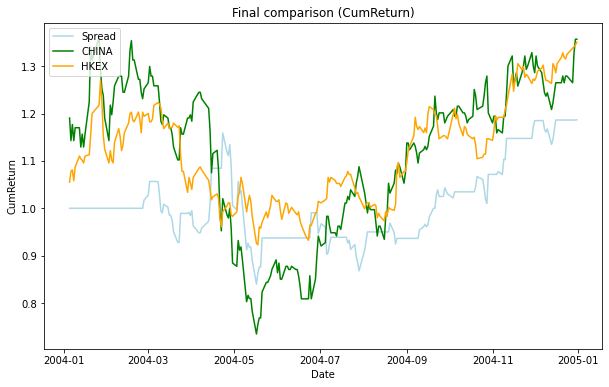

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Final comparison (CumReturn)")
plt.plot(signals["Cumprod spread"], color="lightblue", label="Spread")
plt.plot(signals["Cumprod CHINA"], color="green", label="CHINA")
plt.plot(signals["Cumprod HKEX"], color="orange", label="HKEX")
plt.xlabel("Date")
plt.ylabel("CumReturn")
plt.legend(loc="upper left")
plt.show()